# **1.** **Introdução ao problema**

Analisaremos um conjunto de dados de uma instituição financeira seguindo as regras estabelecidas pela **LGPD**. Queremos estudar as características de um cliente inadimplente, isto é, em quais circuntâncias este cliente deixa de honrar com suas dívidas quando comparado a clientes adimplentes.

**Etapas:**

1. Explorar os dados de crédito dos clientes da instituição financeira;
1. Estamos interessados em explicar a coluna chamada de default, que indica se um cliente é *adimplente (default = 0)* ou *inadimplente (default = 1)*;
1. O objetivo é entender porque um cliente deixa de honrar com suas dívidas baseado no comportamento de alguns atributos contidos na base de dados.
1. Finalmente, ajudar a instituição financeira com as análises e identificar o perfil destes clientes "não-default" com intuito de desenvolver soluções para evitar prejuízos.

# **2.** **Importando bibliotecas**

Vamos utilizar as seguintes bibliotecas:

* O **Pandas** para ler e manipular os dados;
* O **Seaborn** e o **Matplotlib** para criação e visualização dos gráficos.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# **3.** **Carregamento e geração de dados**

Vamos começar carregando nosso conjunto de dados que será analisado.

In [2]:
URL = '../input/dataset/dados_de_credito.csv'

df = pd.read_csv(URL, na_values='na')

df.head(n=5)

,id,default,idade,sexo,dependentes,escolaridade,estado_civil,salario_anual,tipo_cartao,meses_de_relacionamento,qtd_produtos,iteracoes_12m,meses_inativo_12m,limite_credito,valor_transacoes_12m,qtd_transacoes_12m
0,768805383,0,45,M,3,ensino medio,casado,$60K - $80K,blue,39,5,3,1,"12.691,51","1.144,90",42
1,818770008,0,49,F,5,mestrado,solteiro,menos que $40K,blue,44,6,2,1,"8.256,96","1.291,45",33
2,713982108,0,51,M,3,mestrado,casado,$80K - $120K,blue,36,4,0,1,"3.418,56","1.887,72",20
3,769911858,0,40,F,4,ensino medio,NaN,menos que $40K,blue,34,3,1,4,"3.313,03","1.171,56",20
4,709106358,0,40,M,3,sem educacao formal,casado,$60K - $80K,blue,21,5,0,1,"4.716,22","816,08",28


# **4.** **Exploração de dados**

**4.1. Estrutura de dados**

In [3]:
linhas, colunas = df.shape
print('\033[1m' + 'Informações da base de dados:' + '\033[0m')
print(f'\n • O conjunto de dados contém {linhas} linhas e {colunas} colunas.')

qtd_total, _ = df.shape
qtd_adimplentes, _ = df[df['default'] == 0].shape
qtd_inadimplentes, _ = df[df['default'] == 1].shape

print(' • A proporcão de clientes', '\033[1m' + 'adimplentes' + '\033[0m', f'é de {qtd_adimplentes} que corresponde à {round(100 * qtd_adimplentes / qtd_total, 2)}% da base de dados.')
print(' • A proporcão de clientes', '\033[1m' + 'inadimplentes' + '\033[0m', f'é de {qtd_inadimplentes} que corresponde à {round(100 * qtd_inadimplentes / qtd_total, 2)}% da base de dados.')

Informações da base de dados:

 • O conjunto de dados contém 10127 linhas e 16 colunas.
 • A proporcão de clientes adimplentes é de 8500 que corresponde à 83.93% da base de dados.
 • A proporcão de clientes inadimplentes é de 1627 que corresponde à 16.07% da base de dados.


**4.2. Analisando schema**

In [4]:
# Colunas e seus respectivos tipos de dados.
df.dtypes

id                          int64
default                     int64
idade                       int64
sexo                       object
dependentes                 int64
escolaridade               object
estado_civil               object
salario_anual              object
tipo_cartao                object
meses_de_relacionamento     int64
qtd_produtos                int64
iteracoes_12m               int64
meses_inativo_12m           int64
limite_credito             object
valor_transacoes_12m       object
qtd_transacoes_12m          int64
dtype: object

In [5]:
# Atributos categóricos.
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436
limite_credito,10127,9272,"1.438,21",11
valor_transacoes_12m,10127,10035,"3.851,51",3


In [6]:
# Atributos numéricos.
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.0,0.0,0.0,0.0,1.0
idade,10127.0,46.325960,8.016814,26.0,41.0,46.0,52.0,73.0
dependentes,10127.0,2.346203,1.298908,0.0,1.0,2.0,3.0,5.0
meses_de_relacionamento,10127.0,35.928409,7.986416,13.0,31.0,36.0,40.0,56.0
qtd_produtos,10127.0,3.812580,1.554408,1.0,3.0,4.0,5.0,6.0
iteracoes_12m,10127.0,2.455317,1.106225,0.0,2.0,2.0,3.0,6.0
meses_inativo_12m,10127.0,2.341167,1.010622,0.0,2.0,2.0,3.0,6.0
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.0,45.0,67.0,81.0,139.0


In [7]:
# Verificando quais colunas possuem dados faltantes (no nosso caso escolaridade, estado_civil, salario_anual).
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade                True
estado_civil                True
salario_anual               True
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

In [8]:
# Obtendo estatísticas sobre as colunas dos dados faltantes.
def stats_dados_faltantes(df: pd.DataFrame) -> None:

    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            stats_dados_faltantes.append(dict_dados_faltantes)

    for stat in stats_dados_faltantes:
        print(stat)
  
print('\033[1m' + 'Dados faltantes base completa:' + '\033[0m')
stats_dados_faltantes(df=df)

print('\n\033[1m' + 'Dados faltantes clientes adimplentes:' + '\033[0m')
stats_dados_faltantes(df=df[df['default'] == 0])

print('\n\033[1m' + 'Dados faltantes clientes inadimplentes:' + '\033[0m')
stats_dados_faltantes(df=df[df['default'] == 1])

Dados faltantes base completa:
{'escolaridade': {'quantidade': 1519, 'porcentagem': 15.0}}
{'estado_civil': {'quantidade': 749, 'porcentagem': 7.4}}
{'salario_anual': {'quantidade': 1112, 'porcentagem': 10.98}}

Dados faltantes clientes adimplentes:
{'escolaridade': {'quantidade': 1263, 'porcentagem': 14.86}}
{'estado_civil': {'quantidade': 620, 'porcentagem': 7.29}}
{'salario_anual': {'quantidade': 925, 'porcentagem': 10.88}}

Dados faltantes clientes inadimplentes:
{'escolaridade': {'quantidade': 256, 'porcentagem': 15.73}}
{'estado_civil': {'quantidade': 129, 'porcentagem': 7.93}}
{'salario_anual': {'quantidade': 187, 'porcentagem': 11.49}}


# **5.** **Limpeza e transformação de dados**

**5.1. Conhecendo melhor a natureza do nosso conjunto de dados, vamos iniciar a transformação e limpeza dos dados para que possam ser melhor analisados.** 

Em especial, vamos:

* Corrigir o schema das nossas colunas;
* Remover os dados faltantes.

**5.2. Correção de schema**

Na etapa de exploração, notamos que as colunas **limite_credito** e **valor_transacoes_12m** estavam sendo interpretadas como colunas categóricas do tipo object, ou seja, as colunas estão sendo interpretadas como **string** pelo pandas (como podem ver nos códigos a seguir) e precisamos que elas sejam do tipo **float**.

In [9]:
# Tipo de dados das colunas como string(object).
df[['limite_credito', 'valor_transacoes_12m']].dtypes

limite_credito          object
valor_transacoes_12m    object
dtype: object

In [10]:
# Colunas originalmente sendo interpretadas como string(object), logo na sequência converteremos para float.
df[['limite_credito', 'valor_transacoes_12m']].head(n=5)

,limite_credito,valor_transacoes_12m
0,"12.691,51","1.144,90"
1,"8.256,96","1.291,45"
2,"3.418,56","1.887,72"
3,"3.313,03","1.171,56"
4,"4.716,22","816,08"


**5.3. Agora criamos uma função para converter o tipo de dado string para float:**

In [11]:
def fn_string_to_float(valor: str) -> float:
    resposta = float(valor.replace(".", "").replace(",", "."))
    return resposta

**5.4. Com a função de conversão pronta, basta aplicá-la nas colunas de interesse:**

In [12]:
df['valor_transacoes_12m'] = df['valor_transacoes_12m'].apply(fn_string_to_float)
df['limite_credito'] = df['limite_credito'].apply(fn_string_to_float)

**5.5. Agora com a transformação dos dados aplicada vamos descrever novamente o schema:**

In [13]:
# Colunas e seus respectivos tipos de dados já com as colunas "limite_credito" e "valor_transacoes_12m" convertidas para float.
df.dtypes

id                           int64
default                      int64
idade                        int64
sexo                        object
dependentes                  int64
escolaridade                object
estado_civil                object
salario_anual               object
tipo_cartao                 object
meses_de_relacionamento      int64
qtd_produtos                 int64
iteracoes_12m                int64
meses_inativo_12m            int64
limite_credito             float64
valor_transacoes_12m       float64
qtd_transacoes_12m           int64
dtype: object

In [14]:
# Atributos categóricos.
df.select_dtypes('object').describe().transpose()

,count,unique,top,freq
sexo,10127,2,F,5358
escolaridade,8608,5,mestrado,3128
estado_civil,9378,3,casado,4687
salario_anual,9015,5,menos que $40K,3561
tipo_cartao,10127,4,blue,9436


In [15]:
# Atributos numéricos após conversão agora com as colunas "limite_credito" e "valor_transacoes_12m".
df.drop('id', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
default,10127.0,0.160660,0.367235,0.00,0.000,0.00,0.000,1.00
idade,10127.0,46.325960,8.016814,26.00,41.000,46.00,52.000,73.00
dependentes,10127.0,2.346203,1.298908,0.00,1.000,2.00,3.000,5.00
meses_de_relacionamento,10127.0,35.928409,7.986416,13.00,31.000,36.00,40.000,56.00
qtd_produtos,10127.0,3.812580,1.554408,1.00,3.000,4.00,5.000,6.00
iteracoes_12m,10127.0,2.455317,1.106225,0.00,2.000,2.00,3.000,6.00
meses_inativo_12m,10127.0,2.341167,1.010622,0.00,2.000,2.00,3.000,6.00
limite_credito,10127.0,8632.440165,9088.788041,1438.00,2555.355,4549.42,11068.175,34516.99
valor_transacoes_12m,10127.0,4404.583047,3397.128078,510.16,2155.825,3899.59,4741.310,18484.93
qtd_transacoes_12m,10127.0,64.858695,23.472570,10.00,45.000,67.00,81.000,139.00


**5.6. Agora faremos a remoção de dados faltantes:**

In [16]:
df.dropna(inplace=True)

print('\033[1m' + 'Conjunto de dados ANTES a remoção de dados faltantes:' + '\033[0m')
print('\n • A proporcão de clientes', '\033[1m' + 'adimplentes' + '\033[0m', f'era de {qtd_adimplentes} que correspondia à {round(100 * qtd_adimplentes / qtd_total, 2)}% da base de dados.')
print(' • A proporcão de clientes', '\033[1m' + 'inadimplentes' + '\033[0m', f'era de {qtd_inadimplentes} que correspondia à {round(100 * qtd_inadimplentes / qtd_total, 2)}% da base de dados.')

print('\n\033[1m' + 'Conjunto de dados APÓS a remoção de dados faltantes:' + '\033[0m')

linhas, colunas = df.shape
print(f'\n • O conjunto de dados após a remoção dos dados faltantes contém {linhas} linhas e {colunas} colunas.')

qtd_total_novo, _ = df.shape
qtd_adimplentes_novo, _ = df[df['default'] == 0].shape
qtd_inadimplentes_novo, _ = df[df['default'] == 1].shape

print(' • A proporcão de clientes', '\033[1m' + 'adimplentes' + '\033[0m', f'após a remoção dos dados faltantes é de {qtd_adimplentes} que corresponde à {round(100 * qtd_adimplentes_novo / qtd_total_novo, 2)}% da base de dados.')
print(' • A proporcão de clientes', '\033[1m' + 'inadimplentes' + '\033[0m', f'após a remoção dos dados faltantes é de {qtd_inadimplentes} que corresponde à {round(100 * qtd_inadimplentes_novo / qtd_total_novo, 2)}% da base de dados.')

Conjunto de dados ANTES a remoção de dados faltantes:

 • A proporcão de clientes adimplentes era de 8500 que correspondia à 83.93% da base de dados.
 • A proporcão de clientes inadimplentes era de 1627 que correspondia à 16.07% da base de dados.

Conjunto de dados APÓS a remoção de dados faltantes:

 • O conjunto de dados após a remoção dos dados faltantes contém 7081 linhas e 16 colunas.
 • A proporcão de clientes adimplentes após a remoção dos dados faltantes é de 8500 que corresponde à 84.28% da base de dados.
 • A proporcão de clientes inadimplentes após a remoção dos dados faltantes é de 1627 que corresponde à 15.72% da base de dados.


In [17]:
# Verificando se os dados faltantes foram removidos com sucesso.
df.isna().any()

id                         False
default                    False
idade                      False
sexo                       False
dependentes                False
escolaridade               False
estado_civil               False
salario_anual              False
tipo_cartao                False
meses_de_relacionamento    False
qtd_produtos               False
iteracoes_12m              False
meses_inativo_12m          False
limite_credito             False
valor_transacoes_12m       False
qtd_transacoes_12m         False
dtype: bool

# **6. Análise de dados**

Com a limpeza e transformação dos dados prontos, vamos criar diversas visualizações para correlacionar variáveis explicativas com a variável resposta para buscar entender qual fator leva um cliente a inadimplência.

**6.1.** **Visualizações categóricas**


In [18]:
sns.set_style("whitegrid")

df_adimplente = df[df['default'] == 0]
df_inadimplente = df[df['default'] == 1]

In [19]:
def categorica_graficos (coluna: str, titulos: list) -> None:

    eixo = 0
    max_y = 0
    max = df.select_dtypes('object').describe()[coluna]['freq'] * 1.1

    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

        df_to_plot = dataframe[coluna].value_counts().to_frame()
        df_to_plot.rename(columns={coluna: 'frequencia_absoluta'}, inplace=True)
        df_to_plot[coluna] = df_to_plot.index
        df_to_plot.sort_values(by=[coluna], inplace=True)
        df_to_plot.sort_values(by=[coluna])

        f = sns.barplot(x=df_to_plot[coluna], y=df_to_plot['frequencia_absoluta'], ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
        f.set_xticklabels(labels=f.get_xticklabels(), rotation=90)

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    return figura

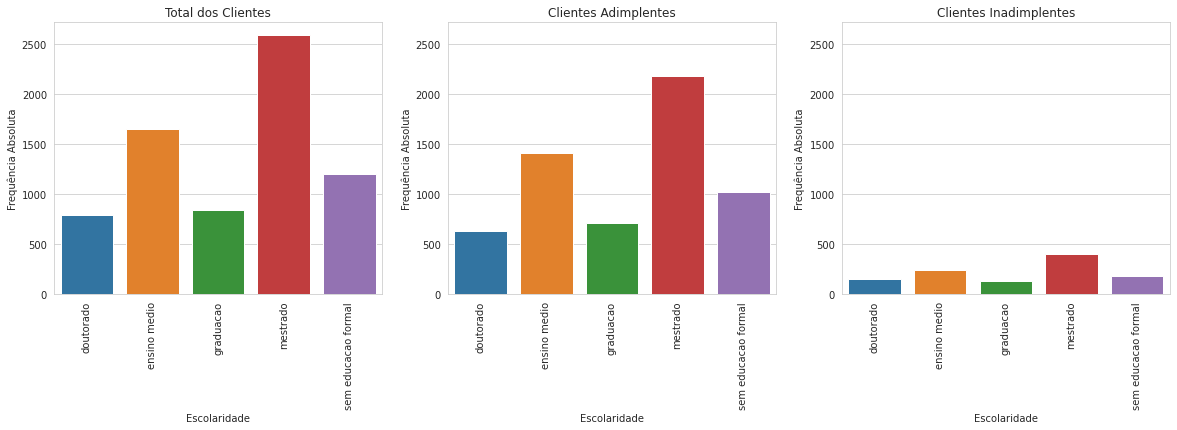

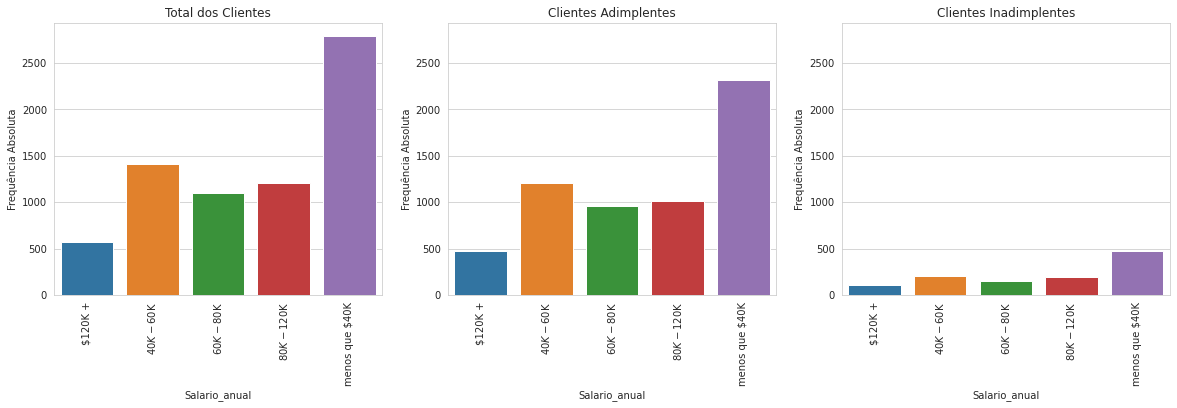

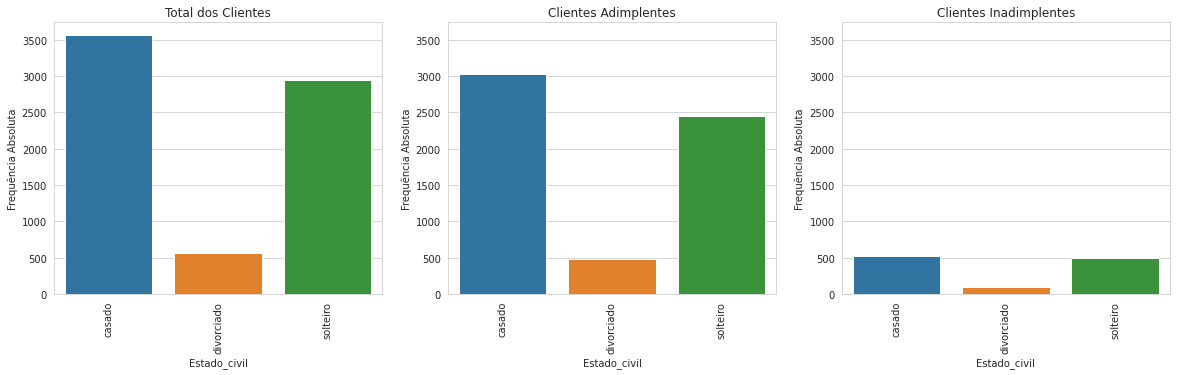

In [20]:
colunas = ['escolaridade', 'salario_anual', 'estado_civil']
titulos = ['Total dos Clientes', 'Clientes Adimplentes', 'Clientes Inadimplentes']

figura = plt

for coluna in colunas:
    figura.show(categorica_graficos(coluna, titulos))

**6.2.** **Visualizações numéricas**

Nesta seção, vamos visualizar a relação entre a variável resposta **default** com os atributos numéricos.

In [21]:
def numerica_graficos (coluna: str, titulos: list) -> None:

    eixo = 0
    max_y = 0
    figura, eixos = plt.subplots(1,3, figsize=(20, 5), sharex=True)

    for dataframe in [df, df_adimplente, df_inadimplente]:

        f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
        f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

        _, max_y_f = f.get_ylim()
        max_y = max_y_f if max_y_f > max_y else max_y
        f.set(ylim=(0, max_y))

        eixo += 1

    return figura

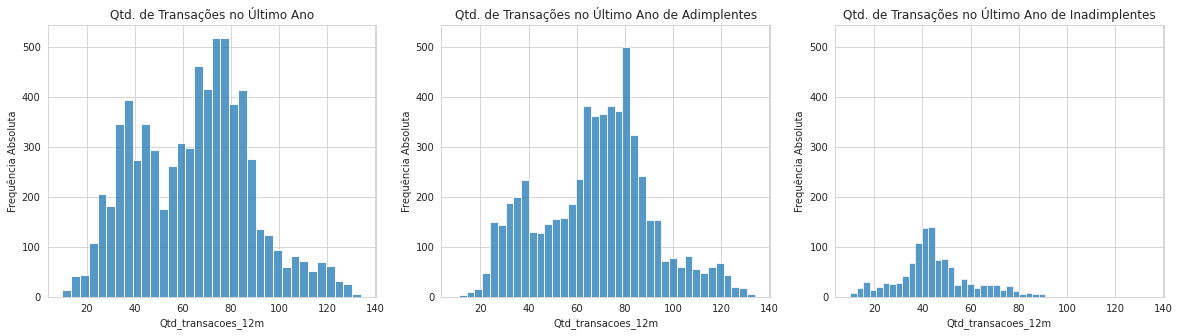

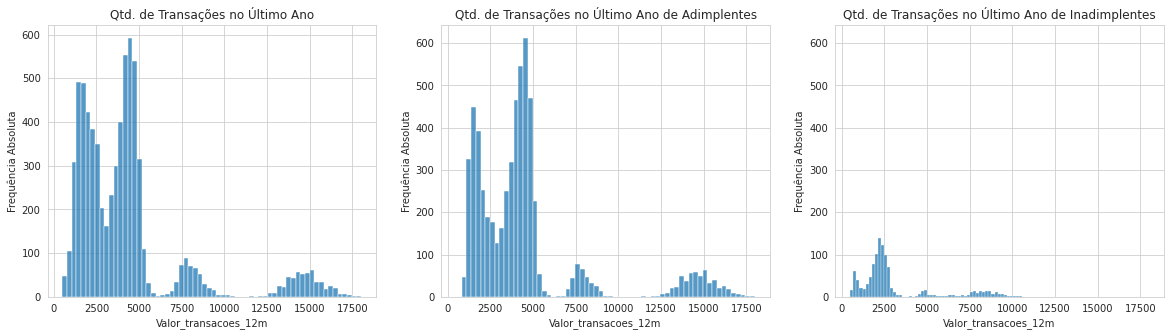

In [22]:
colunas = ['qtd_transacoes_12m', 'valor_transacoes_12m']
titulos = ['Qtd. de Transações no Último Ano', 'Qtd. de Transações no Último Ano de Adimplentes', 'Qtd. de Transações no Último Ano de Inadimplentes']

for coluna in colunas:
    figura.show(numerica_graficos(coluna, titulos))

**6.3.** **Com base no resultado dos histogramas acima das duas variáveis estudadas temos abaixo a relação entre ambas no gráfico de relacionamento.**

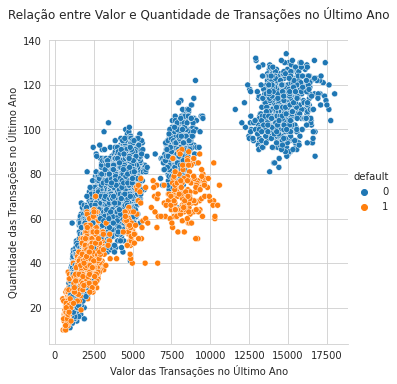

In [23]:
f = sns.relplot(x='valor_transacoes_12m', y='qtd_transacoes_12m', data=df, hue='default')
_ = f.set(
    title='Relação entre Valor e Quantidade de Transações no Último Ano\n', 
    xlabel='Valor das Transações no Último Ano', 
    ylabel='Quantidade das Transações no Último Ano'
  )

# **7. Resumo dos insights gerados**

**7.1. Com base na análise categórica:**

A análise gráfica dos dados com base nas categorias **escolaridade**, **estado civil** e **salario anual** não explicam maior ou menor índice de inandimplência. 
As proporções entre default e não default com relação ao total de dados se mantém praticamente iguais. Ou seja, não sinalizam nenhuma distorção que explique a inadimplência.
 

**7.2. Com base na análise numérica:**

Já com a análise gráfica das variáveis **quantidade de transações em 12 meses ('qtd_transacoes_12m')** e **valor das transações em 12 meses ('valor_transacoes_12m')** é possível perceber que existe algo irregular ou fora do comum para uma faixa específica de valor de transações e quantidade de transações.
 
**Conclusões:**

O percentual de dados vazios que foram descartados da amostra não comprometeram a validade da base de dados.

Existe um forte incremento de clientes inadimplentes na faixa entre 35 e 45 transações anuais e na faixa média de valor de transações em R$ 2.500,00.

Quando sobrepomos as duas amostras no gráfico de relacionamento fica ainda mais visível a existência de uma relação entre o número de transações na faixa 35-45 com os valores médios de R$ 2.500,00, indicando uma atenção especial para esse grupo de clientes.